## Importing Libraries

In [1]:
import pandas as pd
from pypfopt.expected_returns import mean_historical_return
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import discrete_allocation
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import base_optimizer
from pypfopt.discrete_allocation import DiscreteAllocation
from pypfopt.hierarchical_portfolio import HRPOpt

C:\Users\ruchd\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ruchd\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ruchd\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Getting the Data

In [2]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT', 'MU', 'BA','GOOG','BABA','GE','AMD','BAC','GM','T','UAA','XOM','RRC','PFE','JPM','SBUX']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2022-6-1')['Adj Close']
#print(data.iloc[-1])
# Print first 5 rows of the data
#print(data.head())
#print(data.tail())

[*********************100%***********************]  17 of 17 completed


## Markowitz with Sharpe maximization

In [3]:
# Prepare historical price data for assets
#historical_prices = pd.read_csv('historical_prices.csv', index_col=0, parse_dates=True)
historical_prices = data
#target_volatility = 0.2


# Calculate expected returns
returns = expected_returns.mean_historical_return(historical_prices)
cov_matrix = risk_models.sample_cov(historical_prices)

# Create an instance of EfficientFrontier
ef = EfficientFrontier(returns, cov_matrix,weight_bounds = (0,0.2))

# Efficient Frontier with random portfolios

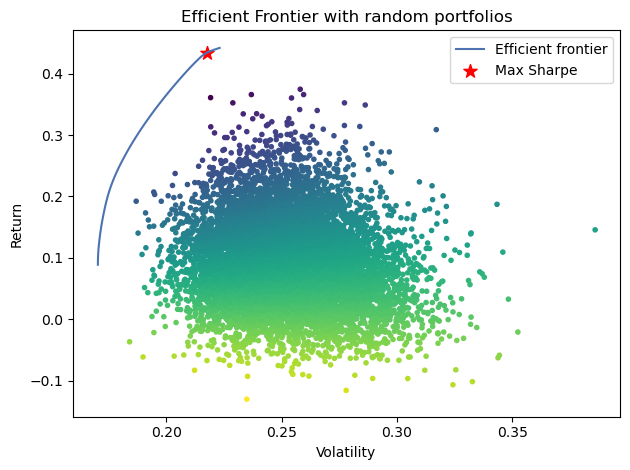

In [4]:
import pypfopt.plotting as plotting
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [5]:
# Optimize for maximum Sharpe ratio

#weights = ef.max_sharpe()

#  print weights
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict([('AAPL', 0.19851), ('AMD', 0.0), ('BA', 0.20002), ('BABA', 0.0), ('BAC', 0.0), ('GE', 0.20002), ('GM', 0.0), ('GOOG', 0.0), ('JPM', 0.0), ('MU', 0.0), ('PFE', 0.0), ('RRC', 0.0), ('SBUX', 0.2), ('T', 0.0), ('UAA', 0.0), ('WMT', 0.2), ('XOM', 0.00155)])


In [6]:
#to know the expected performance of the portfolio with optimal weights w
ef.portfolio_performance(verbose=True)

Expected annual return: 44.2%
Annual volatility: 22.3%
Sharpe Ratio: 1.89


(0.44180327873925856, 0.22308259262151744, 1.8907942290902597)

In [7]:
# Calculate the discrete allocation of assets based on the optimal weights
latest_prices = historical_prices.iloc[-1]  # Latest prices for the assets
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()

C:\Users\ruchd\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [8]:
print("Optimal Allocation:", allocation)

Optimal Allocation: {'AMD': 1, 'BA': 9, 'BABA': 1, 'BAC': 4, 'GE': 19, 'GM': 3, 'GOOG': 1, 'MU': 1, 'PFE': 3, 'RRC': 4, 'SBUX': 21, 'T': 12, 'UAA': 59, 'WMT': 13, 'XOM': 1}


## Markowitz with Target Volatility

In [9]:
# Prepare historical price data for assets
#historical_prices = pd.read_csv('historical_prices.csv', index_col=0, parse_dates=True)
historical_prices = data
target_volatility = 0.2


# Calculate expected returns
returns = expected_returns.mean_historical_return(historical_prices)
cov_matrix = risk_models.sample_cov(historical_prices)

# Create an instance of EfficientFrontier
ef_tv = EfficientFrontier(returns, cov_matrix,weight_bounds = (0,0.2))

ef_tv.efficient_risk(target_volatility)

OrderedDict([('AAPL', 0.0227512171280546),
             ('AMD', 6.889284e-10),
             ('BA', 0.1618858828362417),
             ('BABA', 8.297342e-10),
             ('BAC', 9.515695e-10),
             ('GE', 0.1999999991351257),
             ('GM', 4.7902e-10),
             ('GOOG', 2.7501545e-09),
             ('JPM', 1.826459859e-07),
             ('MU', 6.562122e-10),
             ('PFE', 0.09845883493692),
             ('RRC', 5.111973e-10),
             ('SBUX', 0.1999999838502959),
             ('T', 0.0152749275149866),
             ('UAA', 1.593367e-10),
             ('WMT', 0.1999999991711686),
             ('XOM', 0.1016289657545355)])

In [10]:
#  print weights
cleaned_weights_tv = ef_tv.clean_weights()
print(cleaned_weights)

OrderedDict([('AAPL', 0.19851), ('AMD', 0.0), ('BA', 0.20002), ('BABA', 0.0), ('BAC', 0.0), ('GE', 0.20002), ('GM', 0.0), ('GOOG', 0.0), ('JPM', 0.0), ('MU', 0.0), ('PFE', 0.0), ('RRC', 0.0), ('SBUX', 0.2), ('T', 0.0), ('UAA', 0.0), ('WMT', 0.2), ('XOM', 0.00155)])


In [11]:
#to know the expected performance of the portfolio with optimal weights w
ef_tv.portfolio_performance(verbose=True)

Expected annual return: 36.5%
Annual volatility: 20.0%
Sharpe Ratio: 1.73


(0.365193102514493, 0.20000000284846295, 1.7259654879907211)

In [12]:
# Calculate the discrete allocation of assets based on the optimal weights
latest_prices = historical_prices.iloc[-1]  # Latest prices for the assets
da = DiscreteAllocation(cleaned_weights_tv, latest_prices, total_portfolio_value=10000)
allocation_tv, leftover = da.lp_portfolio()

In [13]:
print("Optimal Allocation:", allocation_tv)

Optimal Allocation: {'AAPL': 1, 'BA': 7, 'GE': 19, 'PFE': 24, 'SBUX': 20, 'T': 10, 'WMT': 13, 'XOM': 10}


## Markowitz with Monthly Rebalancing keeping Original Weights Only

## Markowitz with Monthly Rebalancing - With Original Weights Revising every 12 months